# Introduction to Statistics in python

In this section, we will cover how you can use Python to do some statistics. There are many packages to do so, but we will focus on four:

- [pandas](https://pandas.pydata.org/)
- [scipy's stats module](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [statsmodels](http://www.statsmodels.org/stable/index.html)
- [seaborn](https://seaborn.pydata.org/index.html)

This notebook is strongly based on the [scipy-lectures.org](http://www.scipy-lectures.org/packages/statistics/index.html) section about statistics.

# Data representation and interaction

## Data as a table

The setting that we consider for statistical analysis is that of multiple *observations* or *samples* described by a set of different *attributes* or *features*. The data can than be seen as a `2D table`, or `matrix`, with columns giving the different attributes of the data, and rows the observations. For example purposes, we will make use of phenotypic information within a dataset from [OpenNeuro](https://openneuro.org/datasets/ds003709/versions/1.0.0), provided as part of the following publication:

[Keren H., Zheng C., Jangraw D.C., Chang K., Vitale A., Rutledge R.B., Pereira F., Nielson D.M., Stringaris A. (2021). The temporal representation of experience in subjective mood. eLife, 2021;10:e62051](https://doi.org/10.7554/eLife.62051).

It contains sex, age, handedness, group id, Mood and Feelings Questionnaire total scores and Snaith-Hamilton Pleasure Scale total scores for a fair amount of participants.

We will use `curl` to gather the respective file:

In [14]:
%%bash
curl https://openneuro.org/crn/datasets/ds003709/snapshots/1.0.0/files/participants.tsv -o /data/participants_stats.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1761    0  1761    0     0  14238      0 --:--:-- --:--:-- --:--:-- 14201


In [15]:
!head /data/participants_stats.tsv

participant_id	sex	age	handedness	group	MFQ	SHAPS
sub-20900	M	17	RIGHT	HV	0.0	1.0
sub-22686	M	16	RIGHT	HV	2.0	10.0
sub-23017	F	17	RIGHT	MDD	15.0	6.0
sub-23108	F	16	RIGHT	HV	0.0	7.0
sub-23303	F	16	RIGHT	HV	0.0	0.0
sub-23399	F	17	RIGHT	MDD	1.0	14.0
sub-23520	F	17	RIGHT	MDD	7.0	22.0
sub-23540	F	16	RIGHT	MDD	5.0	21.0
sub-23546	F	17	RIGHT	MDD	1.0	0.0


<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/512px-Pandas_logo.svg.png" width="45%"></center>


## The pandas data-frame

### Creating dataframes: reading data files or converting arrays
 


#### Reading from a CSV file
Using the above CSV file that gives observations of brain size and weight and IQ (Willerman et al. 1991), the data are a mixture of numerical and categorical values::

In [16]:
import pandas as pd
data = pd.read_csv('/data/participants_stats.tsv', sep='\t', na_values=".")
data

,participant_id,sex,age,handedness,group,MFQ,SHAPS
0,sub-20900,M,17,RIGHT,HV,0.0,1.0
1,sub-22686,M,16,RIGHT,HV,2.0,10.0
2,sub-23017,F,17,RIGHT,MDD,15.0,6.0
3,sub-23108,F,16,RIGHT,HV,0.0,7.0
4,sub-23303,F,16,RIGHT,HV,0.0,0.0
5,sub-23399,F,17,RIGHT,MDD,1.0,14.0
6,sub-23520,F,17,RIGHT,MDD,7.0,22.0
7,sub-23540,F,16,RIGHT,MDD,5.0,21.0
8,sub-23546,F,17,RIGHT,MDD,1.0,0.0
9,sub-23549,M,16,RIGHT,MDD,4.0,20.0


#### Creating from arrays
A `pandas.DataFrame` can also be seen as a dictionary of 1D 'series', eg arrays or lists. If we have 3 ``numpy`` arrays:

In [17]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

We can expose them as a `pandas.DataFrame`:

In [18]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t}).head()

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363


**Other inputs**: [pandas](http://pandas.pydata.org) can input data from SQL, excel files, or other formats. See the [pandas documentation](http://pandas.pydata.org).

### Manipulating data

`data` is a `pandas.DataFrame`, that resembles R's dataframe:

In [19]:
data.shape    # 51 rows and 7 columns

(51, 7)

In [20]:
data.columns  # It has columns

Index(['participant_id', 'sex', 'age', 'handedness', 'group', 'MFQ', 'SHAPS'], dtype='object')

In [21]:
print(data['group'].head())  # Columns can be addressed by name

0     HV
1     HV
2    MDD
3     HV
4     HV
Name: group, dtype: object


In [22]:
# Simpler selector
data[data['group'] == 'HV']['MFQ'].mean()

1.5294117647058822

**Note:** For a quick view on a large dataframe, use its `describe` `pandas.DataFrame.describe`.

In [23]:
data.describe()

,age,MFQ,SHAPS
count,51.000000,46.000000,46.000000
mean,15.568627,5.739130,9.195652
std,1.360219,5.511341,7.759208
min,12.000000,0.000000,0.000000
25%,15.000000,1.000000,2.000000
50%,16.000000,5.000000,8.500000
75%,17.000000,8.000000,15.000000
max,18.000000,20.000000,26.000000


In [24]:
# Frequency count for a given column
data['age'].value_counts()

16    15
17    12
15    11
14     7
13     3
18     2
12     1
Name: age, dtype: int64

In [25]:
# Dummy-code # of group (i.e., get N-binary columns)
pd.get_dummies(data['group'])[:15]

,HV,MDD
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


#### The [split-apply-combine](https://www.jstatsoft.org/article/view/v040i01/v40i01.pdf) pattern
* A very common data processing strategy is to...
    * Split the dataset into groups
    * Apply some operation(s) to each group
    * (Optionally) combine back into one dataset

Pandas provides powerful and fast tools for this. For example the `groupby` function.

**groupby**: splitting a dataframe on values of categorical variables:

In [26]:
groupby_group = data.groupby('group')
for group, value in groupby_group['MFQ']:
     print((group, value.mean()))

('HV', 1.5294117647058822)
('MDD', 8.206896551724139)


`groupby_group` is a powerful object that exposes many operations on the resulting group of `dataframes`:

In [27]:
groupby_group.mean()

,age,MFQ,SHAPS
group,,,
HV,15.450000,1.529412,4.235294
MDD,15.645161,8.206897,12.103448


### Plotting data

Pandas comes with some plotting tools (`pandas.tools.plotting`, using
`matplotlib` behind the scene) to display statistics of the data in
`dataframes`.

For example, let's use `boxplot` (in this case even `groupby_group.boxplot`) to better understand the structure of the data.

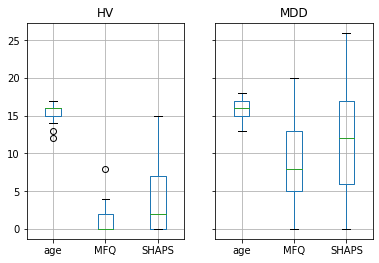

In [28]:
%matplotlib inline
groupby_group.boxplot(column=['age', 'MFQ', 'SHAPS']);

#### Scatter matrices

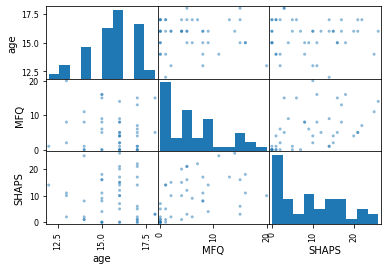

In [29]:
pd.plotting.scatter_matrix(data[['age', 'MFQ', 'SHAPS']]);

#### Plot content of a dataset

In [30]:
data.head()

,participant_id,sex,age,handedness,group,MFQ,SHAPS
0,sub-20900,M,17,RIGHT,HV,0.0,1.0
1,sub-22686,M,16,RIGHT,HV,2.0,10.0
2,sub-23017,F,17,RIGHT,MDD,15.0,6.0
3,sub-23108,F,16,RIGHT,HV,0.0,7.0
4,sub-23303,F,16,RIGHT,HV,0.0,0.0


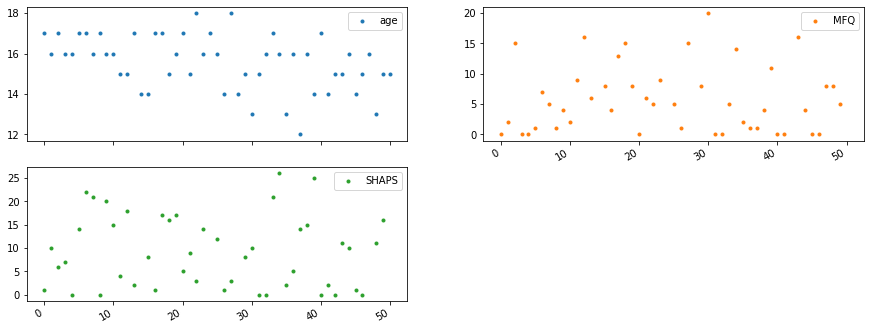

In [31]:
data.plot(lw=0, marker='.', subplots=True, layout=(-1, 2), figsize=(15, 6));

<img src="https://github.com/raphaelvallat/pingouin/blob/master/docs/pictures/logo_pingouin.png?raw=true" width="50%"/>

### _Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy._




- ANOVAs: one- and two-ways, repeated measures, mixed, ancova
- Post-hocs tests and pairwise comparisons
- Robust correlations
- Partial correlation, repeated measures correlation and intraclass correlation
- Linear/logistic regression and mediation analysis
- Bayesian T-test and Pearson correlation
- Tests for sphericity, normality and homoscedasticity
- Effect sizes and power analysis
- Parametric/bootstrapped confidence intervals around an effect size or a correlation coefficient
- Circular statistics
- Plotting: Bland-Altman plot, Q-Q plot, etc...

**Pingouin is designed for users who want simple yet exhaustive statistical functions.**


##### **material scavenged from [10 minutes to Pingouin](https://pingouin-stats.org/index.html) and [the pingouin docs](https://pingouin-stats.org/api.html)

In [32]:
import pingouin as pg

[Measures of correlation](https://pingouin-stats.org/generated/pingouin.corr.html#pingouin.corr)

"In the broadest sense correlation is any statistical association, though in common usage it most often refers to how close two variables are to having a linear relationship with each other" - [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

When talking about correlation, we commonly mean the Pearson correlation coefficient, also referred to as Pearson's r

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/93185aed3047ef42fa0f1b6e389a4e89a5654afa"/>



In [33]:
pearson_correlation = pg.corr(data['MFQ'], data['SHAPS'])
display(pearson_correlation)
cor_coeeficient = pearson_correlation['r']
n =  len(data) # sample size

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,45,0.457,"[0.19, 0.66]",0.209,0.171,0.001601,16.321,0.898


### Test summary

- 'n' : Sample size (after NaN removal)
- 'outliers' : number of outliers (only for 'shepherd' or 'skipped')
- 'r' : Correlation coefficient
- 'CI95' : [95% parametric confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval)
- 'r2' : [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination)
- 'adj_r2' : [Adjusted R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)
- 'p-val' : one or two tailed p-value
- 'BF10' : Bayes Factor of the alternative hypothesis (Pearson only)
- 'power' : achieved power of the test (= 1 - type II error)

### Before we calculate:  `Testing statistical premises`

Statistical procedures can be classfied into either [`parametric`](https://en.wikipedia.org/wiki/Parametric_statistics) or `non parametric` prcedures, which require different necessary preconditions to be met in order to show consistent/robust results. 
Generally people assume that their data follows a gaussian distribution, which allows for parametric tests to be run.
Nevertheless it is essential to first test the distribution of your data to decide if the assumption of normally distributed data holds, if this is not the case we would have to switch to non parametric tests.

### [Shapiro Wilk normality  test](https://pingouin-stats.org/generated/pingouin.normality.html#pingouin.normality)

Standard procedure to test for normal distribution. Tests if the distribution of you data deviates significtanly from a normal distribution.
returns:
- `normal` : `boolean`
    `True` if `x` comes from a `normal distribution`.

- `p` : `float`
    `P-value`.


In [37]:
# Return a boolean (true if normal) and the associated p-value
pg.normality(data['MFQ'])

(True, 1.0)

### [Henze-Zirkler multivariate normality test](https://pingouin-stats.org/generated/pingouin.multivariate_normality.html#pingouin.multivariate_normality)

Same procedure for [multivariate normal distributions](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)

returns 

- normal : boolean
    True if X comes from a multivariate normal distribution.

- p : float
    P-value.

In [38]:
# Return a boolean (true if normal) and the associated p-value
import numpy as np
np.random.seed(123)
mean, cov, n = [4, 6], [[1, .5], [.5, 1]], 30
X = np.random.multivariate_normal(mean, cov, n)
pg.multivariate_normality(X, alpha=.05)

(True, 0.7523511059223016)

### [Mauchly test for sphericity](https://pingouin-stats.org/generated/pingouin.sphericity.html#pingouin.sphericity)

"Sphericity is the condition where the variances of the differences between all combinations of related groups (levels) are equal. Violation of sphericity is when the variances of the differences between all combinations of related groups are not equal." - https://statistics.laerd.com/statistical-guides/sphericity-statistical-guide.php




returns 

- spher : boolean
    True if data have the sphericity property.

- W : float
    Test statistic

- chi_sq : float
    Chi-square statistic

- ddof : int
    Degrees of freedom

- p : float
    P-value.

In [39]:
pg.sphericity(data)

(False, 0.002, 302.823, 20, 2.142051582323624e-52)

### [Testing for homoscedasticity](https://pingouin-stats.org/generated/pingouin.homoscedasticity.html#pingouin.homoscedasticity)

"In statistics, a sequence or a vector of random variables is homoscedastic /ˌhoʊmoʊskəˈdæstɪk/ if all random variables in the sequence or vector have the same finite variance." - [wikipedia](https://en.wikipedia.org/wiki/Homoscedasticity)

returns:	
- equal_var : boolean
    True if data have equal variance.

- p : float
    P-value.




*Note:
This function first tests if the data are normally distributed using the **Shapiro-Wilk test**. If yes, then the homogeneity of variances is measured using the **Bartlett test**. If the data are not normally distributed, the **Levene test**, which is less sensitive to departure from normality, is used.*

In [44]:
np.random.seed(123)
# Scale = standard deviation of the distribution.
array_1 = np.random.normal(loc=0, scale=1., size=100)
array_2 = np.random.normal(loc=0, scale=0.8,size=100)
print(np.var(array_1), np.var(array_2))

pg.homoscedasticity(array_1, array_2, alpha=.05)

1.2729265592243306 0.6022425373276372


(False, 0.0)

## Parametric tests
## Student's t-test: the simplest statistical test

### 1-sample t-test: testing the value of a population mean

tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean).


`pingouin.ttest` returns the T_statistic, the p-value, the [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics), the [Cohen d effect size](https://en.wikiversity.org/wiki/Cohen%27s_d), the achieved [power](https://en.wikipedia.org/wiki/Power_(statistics%29) of the test ( = 1 - type II error (beta) = [P(Reject H0|H1 is true)](https://deliveroo.engineering/2018/12/07/monte-carlo-power-analysis.html)), and the [Bayes Factor](https://en.wikipedia.org/wiki/Bayes_factor) of the alternative hypothesis





In [45]:
pg.ttest(data['MFQ'],0)

,T,p-val,dof,tail,cohen-d,power,BF10
T-test,7.063,8.228161e-09,45,two-sided,1.041,1.0,1527145.713


### 2-sample t-test: testing for difference across populations

We have seen above that the mean `MFQ` in the `MDD` and `HV` populations
were different. To test if this is significant, we do a 2-sample t-test:

In [46]:
MDD_MFQ = data[data['group'] == 'MDD']['MFQ']
HV_MFQ = data[data['group'] == 'HV']['MFQ']

In [47]:
pg.ttest(MDD_MFQ, HV_MFQ)

,T,p-val,dof,dof-corr,tail,cohen-d,power,BF10
T-test,5.866,6.718419e-07,44,40.991061,two-sided,1.486,0.997,22256.489


### Plot achieved power of a paired T-test

Plot the curve of achieved power given the effect size (Cohen d) and the sample size of a paired T-test.

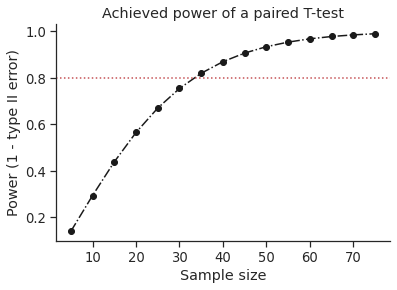

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='notebook', font_scale=1.2)

d = 0.5  # Fixed effect size
n = np.arange(5, 80, 5)  # Incrementing sample size

# Compute the achieved power
pwr = pg.power_ttest(d=d, n=n, contrast='paired', tail='two-sided')

# Start the plot
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='r', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()

### Non parametric tests:


Unlike the parametric test these do not require the assumption of normal distributions.

"`Mann-Whitney U Test` (= Wilcoxon rank-sum test). It is the non-parametric version of the independent T-test.
Mwu tests the hypothesis that data in x and y are samples from continuous distributions with equal medians. The test assumes that x and y are independent. This test corrects for ties and by default uses a continuity correction." - [mwu-function](https://pingouin-stats.org/generated/pingouin.mwu.html#pingouin.mwu)



Test summary

- 'W-val' : W-value
- 'p-val' : p-value
- 'RBC'   : matched pairs rank-biserial correlation (effect size)
- 'CLES'  : common language effect size

In [49]:
pg.mwu(MDD_MFQ, HV_MFQ)

,U-val,p-val,RBC,CLES
MWU,442.0,0.000008,-0.793103,0.872211


"`Wilcoxon signed-rank test` is the non-parametric version of the paired T-test.

The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. A continuity correction is applied by default." - [wilcoxon - func](https://pingouin-stats.org/generated/pingouin.wilcoxon.html#pingouin.wilcoxon)


In [50]:
# example from the function definition
# Wilcoxon test on two related samples.
x = [20, 22, 19, 20, 22, 18, 24, 20]
y = [38, 37, 33, 29, 14, 12, 20, 22]
print("Medians = %.2f - %.2f" % (np.median(x), np.median(y)))
pg.wilcoxon(x, y, tail='two-sided')

Medians = 20.00 - 25.50


/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,W-val,p-val,RBC,CLES
Wilcoxon,9.0,0.043089,0.5,0.609375


<center><img src="https://docs.scipy.org/doc/numpy-1.5.x/_static/scipyshiny_small.png" width="20%"></center>

### `scipy.stats` - Hypothesis testing: comparing two groups

For simple [statistical tests](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing), it is also possible to use the `scipy.stats` sub-module of [`scipy`](http://docs.scipy.org/doc/).

In [51]:
from scipy import stats

### 1-sample t-test: testing the value of a population mean

`scipy.stats.ttest_1samp` tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the [T statistic](https://en.wikipedia.org/wiki/Student%27s_t-test), and the [p-value](https://en.wikipedia.org/wiki/P-value) (see the function's help):

In [52]:
stats.ttest_1samp(data['MFQ'].dropna(), 0)

Ttest_1sampResult(statistic=7.062650755155121, pvalue=8.228161269771835e-09)

With a p-value of 8^-09 we can claim that the population mean for the `MFQ` is not `0`.

### 2-sample t-test: testing for difference across populations

We have seen above that the mean `MFQ` in the `MDD` and `HV` populations
were different. To test if this is significant, we do a `2-sample t-test`
with `scipy.stats.ttest_ind`:

In [53]:
stats.ttest_ind(MDD_MFQ.dropna(), HV_MFQ.dropna())

Ttest_indResult(statistic=4.863337342528167, pvalue=1.5121907363581306e-05)

## Paired tests: repeated measurements on the same indivuals

`MFQ` and `SHAPS` are `measures` of interest. Let us test if they are significantly different. We can use a `2 sample test`:

In [54]:
stats.ttest_ind(data['MFQ'].dropna(), data['SHAPS'].dropna())

Ttest_indResult(statistic=-2.4632108396344363, pvalue=0.01567217083007739)

The problem with this approach is that it forgets that there are links
between observations: `MFQ` and `SHAPS` are measured on the same individuals.

Thus the variance due to `inter-subject variability` is confounding, and
can be removed, using a "paired test", or ["repeated measures test"](https://en.wikipedia.org/wiki/Repeated_measures_design):

In [55]:
stats.ttest_rel(data['MFQ'].dropna(), data['SHAPS'].dropna())

Ttest_relResult(statistic=-3.006858621511653, pvalue=0.004308118483154467)

This is equivalent to a 1-sample test on the difference::

In [56]:
stats.ttest_1samp(data['MFQ'].dropna() - data['SHAPS'].dropna(), 0)

Ttest_1sampResult(statistic=nan, pvalue=nan)

T-tests assume Gaussian errors. We can use a [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test), that relaxes this assumption:

In [57]:
stats.wilcoxon(data['MFQ'].dropna(), data['SHAPS'].dropna())

WilcoxonResult(statistic=177.0, pvalue=0.004985029827378135)

**Note:** The corresponding test in the non paired case is the [Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U), `scipy.stats.mannwhitneyu`.

<center><img src="https://www.statsmodels.org/0.8.0/_static/statsmodels_hybi_banner.png" width="50%"></center>


# `statsmodels` - use "formulas" to specify statistical models in Python

Use `statsmodels` to perform linear models, multiple factors or analysis of variance.




## A simple linear regression

Given two set of observations, `x` and `y`, we want to test the hypothesis that `y` is a linear function of `x`.

In other terms:

$y = x * coef + intercept + e$

where $e$ is observation noise. We will use the [statsmodels](http://statsmodels.sourceforge.net) module to:

1. Fit a linear model. We will use the simplest strategy, [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS).
2. Test that $coef$ is non zero.

First, we generate simulated data according to the model:

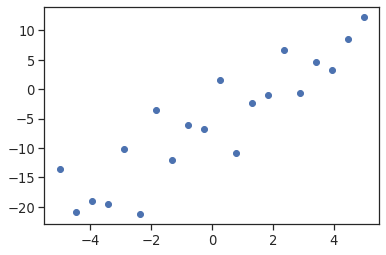

In [58]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 20)
np.random.seed(1)

# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

plt.plot(x, y, 'o');

Then we specify an OLS model and fit it:

In [59]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

**Note:** For more about "formulas" for statistics in Python, see the [statsmodels documentation](http://statsmodels.sourceforge.net/stable/example_formulas.html).

We can inspect the various statistics derived from the fit::

In [60]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           8.56e-08
Time:                        16:14:47   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

### Terminology

Statsmodels uses a statistical terminology: the `y` variable in statsmodels is called *endogenous* while the `x` variable is called *exogenous*. This is discussed in more detail [here](http://statsmodels.sourceforge.net/devel/endog_exog.html). To simplify, `y` (endogenous) is the value you are trying to predict, while `x` (exogenous) represents the features you are using to make the prediction.

## Categorical variables: comparing groups or multiple categories

Let us go back to our data. We can write a comparison between `MFQ` of `MDD` and `HV` groups using a linear model:

In [62]:
data = pd.read_csv('/data/participants_stats.tsv', sep='\t', na_values=".")

In [63]:
model = ols("MFQ ~ group + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MFQ   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     23.65
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.51e-05
Time:                        16:14:54   Log-Likelihood:                -133.38
No. Observations:                  46   AIC:                             270.8
Df Residuals:                      44   BIC:                             274.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5294      1.090      1.403   

### Tips on specifying model
 
***Forcing categorical*** - the 'group' variable is automatically detected as a categorical variable, and thus each of its different values is treated as different entities.

An integer column can be forced to be treated as categorical using:

```python
model = ols('MFQ ~ C(group)', data).fit()
```

***Intercept***: We can remove the intercept using `- 1` in the formula, or force the use of an intercept using `+ 1`.

### Link to t-tests between different MFQ and SHAPS

To compare different types of our measurements of interest, we need to create a `"long-form" table`, listing them, where their type is indicated by a `categorical variable`:

In [64]:
data_mfq = pd.DataFrame({'MOI': data['MFQ'], 'type': 'MFQ'})
data_shaps = pd.DataFrame({'MOI': data['SHAPS'], 'type': 'SHAPS'})
data_long = pd.concat((data_mfq, data_shaps))
print(data_long[::8])

     MOI   type
0    0.0    MFQ
8    1.0    MFQ
16   4.0    MFQ
24   NaN    MFQ
32   0.0    MFQ
40   0.0    MFQ
48   8.0    MFQ
5   14.0  SHAPS
13   2.0  SHAPS
21   9.0  SHAPS
29   8.0  SHAPS
37  14.0  SHAPS
45   1.0  SHAPS


In [65]:
model = ols("MOI ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MOI   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     6.067
Date:                Sun, 17 Oct 2021   Prob (F-statistic):             0.0157
Time:                        16:14:56   Log-Likelihood:                -304.93
No. Observations:                  92   AIC:                             613.9
Df Residuals:                      90   BIC:                             618.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.7391      0.992      5.784

We can see that we retrieve the same values for t-test and corresponding p-values for the effect of the type of MOI than the previous t-test:

In [66]:
stats.ttest_ind(data['MFQ'].dropna(), data['SHAPS'].dropna())

Ttest_indResult(statistic=-2.4632108396344363, pvalue=0.01567217083007739)

## Multiple Regression: including multiple factors

Consider a linear model explaining a variable `z` (the dependent
variable) with 2 variables `x` and `y`:

$z = x \, c_1 + y \, c_2 + i + e$

Such a model can be seen in 3D as fitting a plane to a cloud of (`x`,
`y`, `z`) points (see the following figure).

Text(0.5, 0, 'Z')

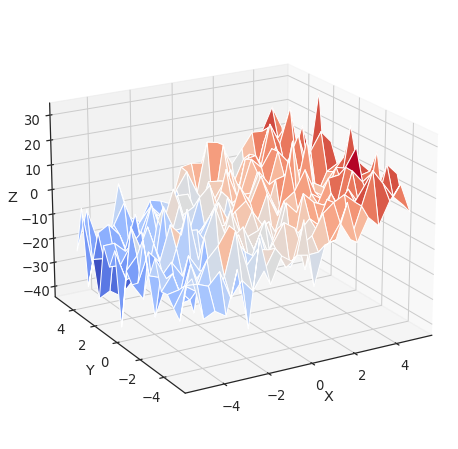

In [67]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-5, 5, 21)

# We generate a 2D grid
X, Y = np.meshgrid(x, x)

# To get reproducable values, provide a seed value
np.random.seed(1)

# Z is the elevation of this 2D grid
Z = -5 + 3*X - 0.5*Y + 8 * np.random.normal(size=X.shape)

# Plot the data
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

### Example: the iris dataset

Sepal and petal size tend to be related: bigger flowers are bigger! But is there, in addition, a systematic effect of species?

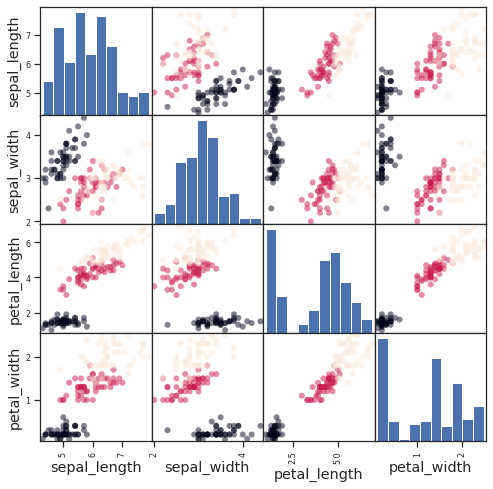

In [68]:
from pandas.plotting import scatter_matrix

#Load the data
data = sns.load_dataset('iris')

# Express the names as categories
categories = pd.Categorical(data['species'])

# The parameter 'c' is passed to plt.scatter and will control the color
scatter_matrix(data, c=categories.codes, marker='o', figsize=(8, 8))

# Plot figure
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)
plt.show()

In [69]:
model = ols('sepal_width ~ species + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     46.08
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           5.14e-21
Time:                        16:14:59   Log-Likelihood:                -37.808
No. Observations:                 150   AIC:                             83.62
Df Residuals:                     146   BIC:                             95.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.99

## Post-hoc hypothesis testing: analysis of variance (ANOVA)

In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance). For this, we write a **vector of 'contrast'** on the parameters estimated: we want to test ``"name[T.versicolor] - name[T.virginica]"``, with an [F-test](https://en.wikipedia.org/wiki/F-test):

In [70]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=array([[3.26191465]]), p=0.07296614041660528, df_denom=146, df_num=1>


Is this difference significant?

<center><img src="https://raw.githubusercontent.com/mwaskom/seaborn/master/doc/_static/logo-wide-lightbg.png" width="50%"></center>

# `seaborn` - use visualization for statistical exploration

[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) combines simple statistical fits with plotting on pandas dataframes.

Let us consider a data giving wages and many other personal information on 500 individuals ([Berndt, ER. The Practice of Econometrics. 1991. NY:Addison-Wesley](http://lib.stat.cmu.edu/datasets/CPS_85_Wages)) which we will gather using a small function based on the [scipy tutorials](https://scipy-lectures.org/packages/statistics/auto_examples/plot_wage_data.html).

In [71]:
def download_wages_data():
    
    import urllib
    import os
    
    import pandas as pd

    if not os.path.exists('wages.txt'):
        # Download the file if it is not present
        urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                           'wages.txt')

    # Give names to the columns
    names = [
        'EDUCATION: Number of years of education',
        'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
        'SEX: 1=Female, 0=Male',
        'EXPERIENCE: Number of years of work experience',
        'UNION: 1=Union member, 0=Not union member',
        'WAGE: Wage (dollars per hour)',
        'AGE: years',
        'RACE: 1=Other, 2=Hispanic, 3=White',
        'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
        'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
        'MARR: 0=Unmarried,  1=Married',
    ]

    short_names = [n.split(':')[0] for n in names]

    data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                           header=None)
    data.columns = short_names

    # Log-transform the wages, because they typically are increased with
    # multiplicative factors
    import numpy as np
    data['WAGE'] = np.log10(data['WAGE'])
    
    return data

In [72]:
import pandas as pd
data = download_wages_data()
data.head()

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:31: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1


## Pairplot: scatter matrices

We can easily have an intuition on the `interactions` between `continuous variables` using `seaborn.pairplot` to display a `scatter matrix`:

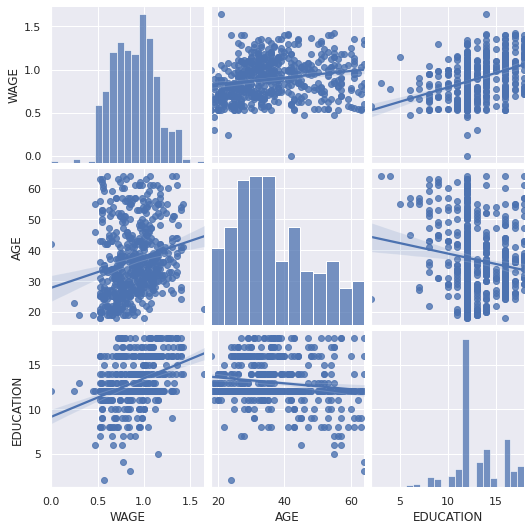

In [73]:
import seaborn
seaborn.set()
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')

`Categorical variables` can be plotted as the `hue`:

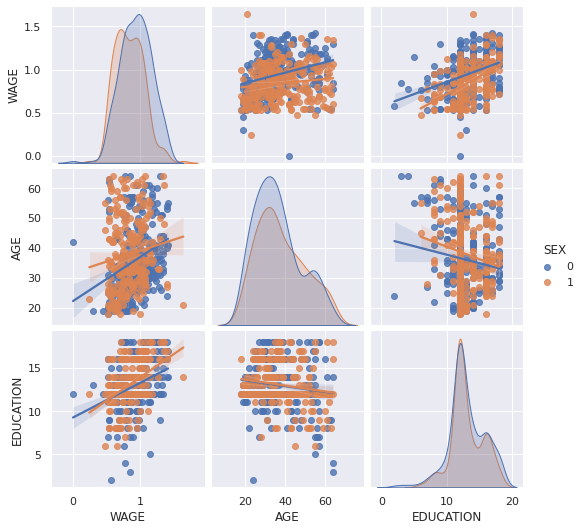

In [74]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')

## lmplot: plotting a univariate regression

A regression capturing the relation between one variable and another, e.g. wage and eduction, can be plotted using `seaborn.lmplot`:

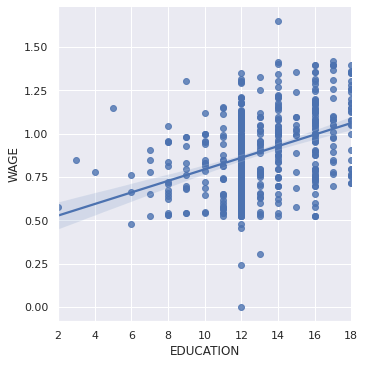

In [75]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

### Robust regression
Given that, in the above plot, there seems to be a couple of data points that are outside of the main cloud to the right, they might be outliers, not representative of the population, but driving the regression.

To compute a regression that is less sensitive to outliers, one must use a [robust model](https://en.wikipedia.org/wiki/Robust_statistics). This is done in seaborn using ``robust=True`` in the plotting functions, or in statsmodels by replacing the use of the OLS by a "Robust Linear Model", `statsmodels.formula.api.rlm`.

# Testing for interactions

Do wages increase more with education for people with dark hair than with light hair?

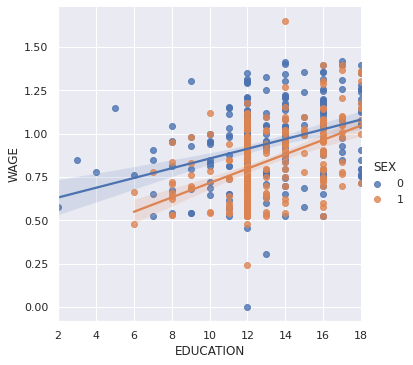

In [76]:
seaborn.lmplot(y='WAGE', x='EDUCATION', hue='SEX', data=data)

The plot above is made of two different fits. We need to formulate a single model that tests for a variance of slope across the population. This is done via an ["interaction"](http://statsmodels.sourceforge.net/devel/example_formulas.html#multiplicative-interactions).

In [77]:
from statsmodels.formula.api import ols
result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.94e-25
Time:                        16:15:09   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861

Can we conclude that education benefits people with dark hair more than people with light hair?

# Take home messages

* Hypothesis testing and p-value give you the **significance** of an effect / difference

* **Formulas** (with categorical variables) enable you to express rich links in your data

* **Visualizing** your data and simple model fits matters!

* **Conditioning** (adding factors that can explain all or part of the variation) is an important modeling aspect that changes the interpretation.